# Hypothesis Test - t test
- 1S :You have a single sample and want to determine if its mean is statistically different from a specific value (e.g., a known population mean, a target value).
    - Comparing the average test score of a sample of students to the national average. 
- Independent, 2S : You have two distinct, unrelated groups and want to see if there's a significant difference in their mean
    - Comparing the average performance of two different groups of employees who received different training methods
- Paired, 2S: You have two sets of data from the same individuals or matched pairs, and you want to assess if there's a significant difference between the means of these paired observations.
    - Comparing a patient's blood pressure before and after receiving a specific medication

## Q1A : 1 sample t-test in python
- Ho : mu = 70  (if pvalue > 0.05) : failed to reject Ho
- Ha : mu != 70 (if pvalue < 0.05); reject Ho infavour of Ha

In [57]:
import numpy as np
from scipy import stats

In [58]:
sample_data = np.array([72, 75, 78, 70, 73, 76, 71, 74, 77, 79])
print(sample_data)

[72 75 78 70 73 76 71 74 77 79]


In [59]:
hypothesized_mean = 70

In [62]:
t_statistic, p_value = stats.ttest_1samp(a=sample_data, popmean=hypothesized_mean)
print(t_statistic, p_value)

4.700096710803842 0.0011200178871001584


In [65]:
if p_value < alpha:
    print("Conclusion: Reject the null hypothesis", p_value)
    print("The sample mean is significantly different from the hypothesized population mean.")
else:
    print("Conclusion: Fail to reject the null hypothesis.")
    print("There is no significant difference between the sample mean and the hypothesized population mean.")

Conclusion: Reject the null hypothesis 0.0011200178871001584
The sample mean is significantly different from the hypothesized population mean.


## Q1B  : 20 samples with mean and std dev, known pop mean
- A random sample of size 20 from a normal population mean 42 and std dev of 5.
- Test the hypothesis that the population mean is 45. Use 5% level of significance
- one-sample t-test, because:
    - Population σ is unknown (you only have sample SD = 5)
    - Sample size = 20 → small sample, so we use the t-distribution
- H Test  : Ho : mu = 45; Ha : mu != 45
- No data provided, hence need to create it
    - ttest_1samp() requires raw data, we can simulate a sample with approximately that mean and standard deviation for demonstration. 
- find p value

In [2]:
import numpy as np
from scipy.stats import ttest_1samp

In [23]:
# Given
n = 20
mu0 = 45
sample_mean = 42
sample_std = 5
alpha = .05

# Simulate sample data with given mean and std
np.random.seed(0)  # for reproducibility
data = np.random.normal(loc=sample_mean, scale=sample_std, size=n)
print(data.round(2), '\n Length-', np.size(data), '\t Mean- ',  np.mean(data).round(2), '\t Std Dev-', np.std(data).round(2))

[50.82 44.   46.89 53.2  51.34 37.11 46.75 41.24 41.48 44.05 42.72 49.27
 45.81 42.61 44.22 43.67 49.47 40.97 43.57 37.73] 
 Length- 20 	 Mean-  44.85 	 Std Dev- 4.25


In [25]:
ttest_1samp(data, popmean=mu0)

TtestResult(statistic=-0.1572219649112036, pvalue=0.8767286552150847, df=19)

In [24]:
# Perform one-sample t-test
t_stat, p_value = ttest_1samp(data, popmean=mu0)
print(f"t-statistic = {t_stat:.3f}")
print(f"p-value = {p_value:.4f}")

t-statistic = -0.157
p-value = 0.8767


## Error in output
- value > 0.05 : Do not reject Ho : 

In [22]:
from scipy.stats import t
import math
# t statistic
t_stat = (sample_mean - mu0) / (sample_std / math.sqrt(n))
df = n - 1

# two-tailed p-value
p_value = 2 * (1 - t.cdf(abs(t_stat), df))

# critical t at 5% (two-tailed)
t_crit = t.ppf(1 - alpha/2, df)

print(f"t-statistic = {t_stat:.3f}")
print(f"p-value = {p_value:.4f}")
print(f"t-critical (±) = {t_crit:.3f}")

t-statistic = -2.683
p-value = 0.0147
t-critical (±) = 2.093


## Q2 : 1 Sample of 8 items (Two Tailed)
- The nine items of a sample had the following values : 
- 45, 47, 50, 52, 48, 47, 49, 53, 51
- Does the mean of 9 itmes differ significantly from the assumed population mean of 47.5
- Since n= 9 (30), we use t-test

In [26]:
from scipy.stats import ttest_1samp

In [27]:
# Data
data = np.array([45, 47, 50, 52, 48, 47, 49, 53, 51])
mu0 = 47.5
n = len(data)
print(data, mu0, n)

[45 47 50 52 48 47 49 53 51] 47.5 9


In [28]:
t_stat, p_value = ttest_1samp(data, popmean=47.5)
print(f"t = {t_stat:.3f}, p = {p_value:.4f}")

t = 1.845, p = 0.1022


- At 5% significance level:
    - p = 0.0904 > 0.05
    - Fail to reject H0
- There is no significant difference between the sample mean (49.11) and the assumed population mean (47.5) at the 5% level.


## Q3 : Two Independent Samples
- Distinct Group
- Two salesman A and B are working in a certain district.
- From a sample survey conducted by Head office, the following results are obtained.
- State whether there is significant differene in average sales between 2 salesman
- A : No of Sales - 20, Avg Sales - 170, Std Dev - 20
- B : No of Sales - 18, Avg Sales - 205, Std Dev - 25
- Hypothesis Tests
    - Ho : mu1 = mu2 ; Ha: mu1 != mu2 

In [66]:
# Given summary stats
n1, mean1, sd1 = 20, 170, 20
n2, mean2, sd2 = 18, 205, 25

In [35]:
import numpy as np
from scipy.stats import ttest_ind
#t_stat, p_value = ttest_ind(sample_A, sample_B, equal_var=False)  # Welch's t-test

In [67]:
#Simulate random data matching those stats
#May vary slightly because the data are simulated.)
np.random.seed(0)
sales_A = np.random.normal(loc=mean1, scale=sd1, size=n1)
sales_B = np.random.normal(loc=mean2, scale=sd2, size=n2)
print(sales_A.round(), np.mean(sales_A).round())
print(sales_B.round(), np.mean(sales_B).round())

[205. 178. 190. 215. 207. 150. 189. 167. 168. 178. 173. 199. 185. 172.
 179. 177. 200. 166. 176. 153.] 181.0
[141. 221. 227. 186. 262. 169. 206. 200. 243. 242. 209. 214. 183. 155.
 196. 209. 236. 235.] 208.0


In [70]:
#help(ttest_ind)

In [71]:
# Two-sample t-test (Welch's test: unequal variances)
t_stat, p_value = ttest_ind(a=sales_A, b=sales_B, equal_var=False)

print(f"t-statistic = {t_stat:.3f}")
print(f"p-value = {p_value:.5f}")

t-statistic = -3.076
p-value = 0.00494


- pvalue < 0.5, So, Reject H0
- The average sales of Salesman A and Salesman B are significantly different.
- Salesman B’s average (≈205) is significantly higher than Salesman A’s (≈170).

## Q4 : Two Independent Samples
- Two lab A & B carry out independent estimates of fat content in ice-cream made by a firm.
- Samples are taken from each batch (independent) and sent to two labs
- Fat content obtained by the labs are recorded below
- sample_A = [7, 8, 7, 3, 8, 6, 9, 4, 7, 8]
- sample_B = [9, 8, 8, 4, 7, 7, 9, 6, 6, 6]
- Is there a significant difference between mean fat content obtained by the 2 labs

In [44]:
sample_A = np.array([7, 8, 7, 3, 8, 6, 9, 4, 7, 8])
sample_B = np.array([9, 8, 8, 4, 7, 7, 9, 6, 6, 6])
print(sample_A.round(), np.mean(sample_A).round())
print(sample_B.round(), np.mean(sample_B).round())

[7 8 7 3 8 6 9 4 7 8] 7.0
[9 8 8 4 7 7 9 6 6 6] 7.0


In [46]:
# Two-sample t-test (Welch's test: unequal variances)
t_stat, p_value = ttest_ind(sample_A, sample_B, equal_var=False)

print(f"t-statistic = {t_stat:.3f}")
print(f"p-value = {p_value:.5f}")

t-statistic = -0.387
p-value = 0.70349


- pvalue > 0.05 : Do not reject Ho
- Mean fat content obtained by 2 labs A & B do not differ siginificantly

## Dependent Samples (Paired Test)
- Same set of members, test before or after; looking for changes
- Patients : before and after treatment
- Students : before and after Python Training

## QC.1 Python Tests
- To test whether a course in python improved performance, similar test was given to 12 pariticipants, their scores both before and after the course are given below
- before = [44, 40, 61, 52, 32, 44, 70, 41, 67, 72, 53, 72]
- after  = [53, 38, 69, 57, 46, 39, 73, 48, 73, 74, 60, 78]
- Test at 5% significance level if the course was useful in terms of performance on the test
- Hypothesis :
    - Ho : mu1 = mu2, or mu2 - mu1 = 0 ;
    - Ha : mu1 != mu2 :
          - mu1 < mu2 or mu2 - m1 > 0

In [73]:
# Paired observations
import numpy as np
from scipy.stats import ttest_rel
before = np.array([44, 40, 61, 52, 32, 44, 70, 41, 67, 72, 53, 72])
after  = np.array([53, 38, 69, 57, 46, 39, 73, 48, 73, 74, 60, 78])
print(before, '\n', after, '\n' ,len(before), len(after))

[44 40 61 52 32 44 70 41 67 72 53 72] 
 [53 38 69 57 46 39 73 48 73 74 60 78] 
 12 12


In [77]:
#help(ttest_rel)

In [78]:
# Paired t-test
t_stat, p_value_two_tailed = ttest_rel(a=after, b=before)
print(t_stat, p_value_two_tailed)

3.445359719553577 0.005472667818346524


- A two-tailed test splits α = 0.05 into 0.025 in each tail.
- A one-tailed test uses the full α = 0.05 in one tail.
- The t-distribution is symmetric, so halving the two-tailed p-value gives the correct probability
- for one tail (when the t-statistic is in the expected direction).
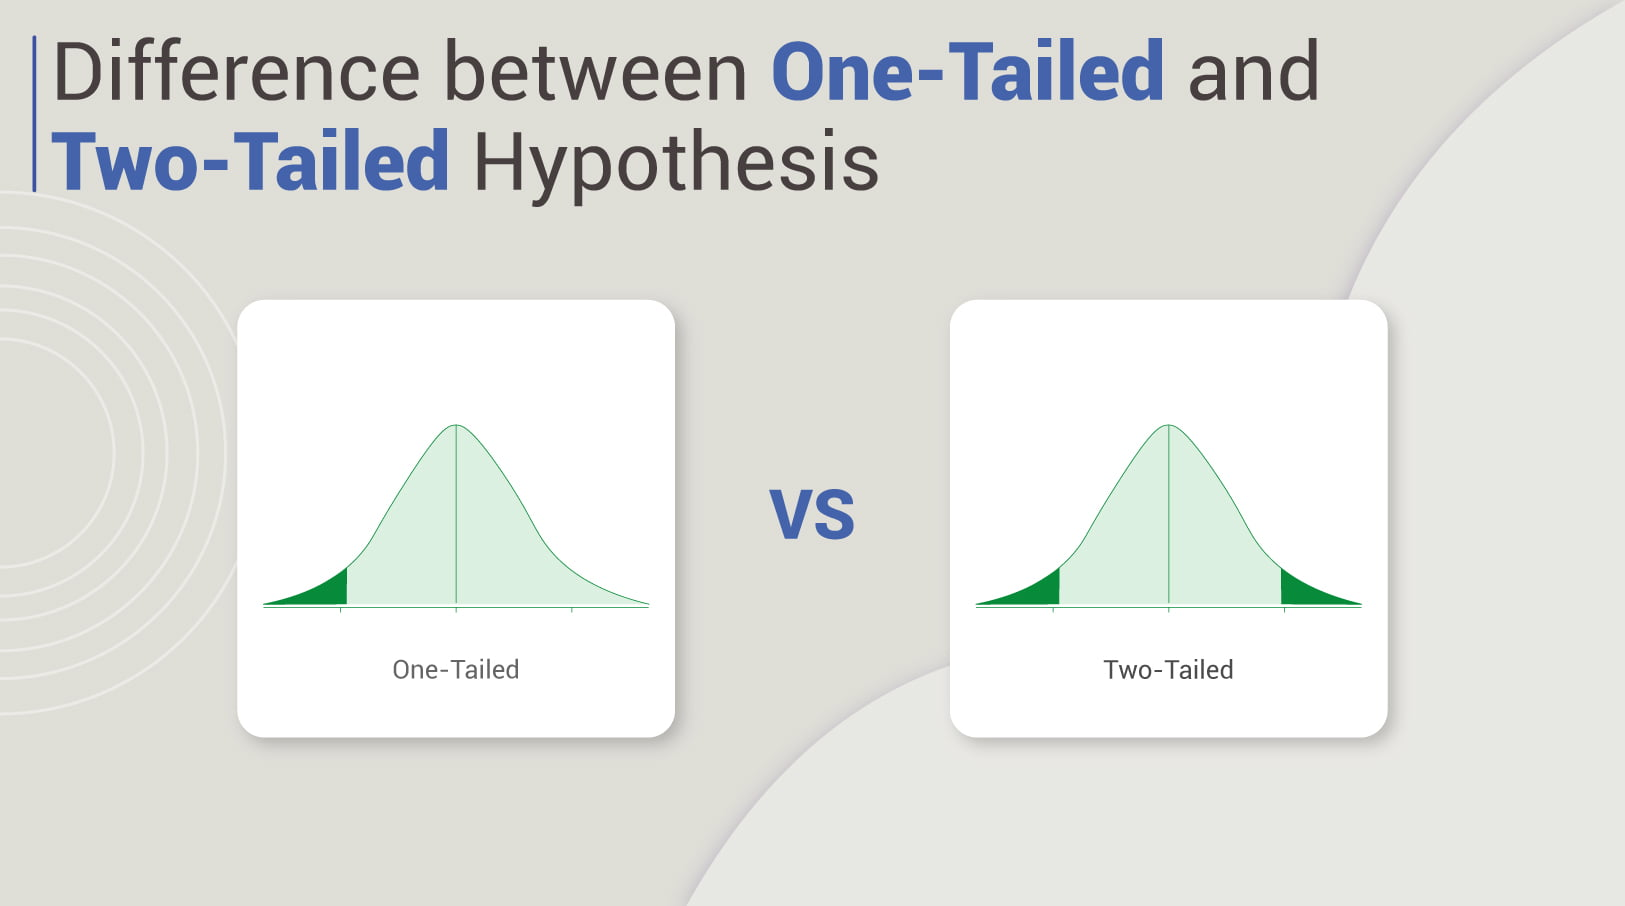
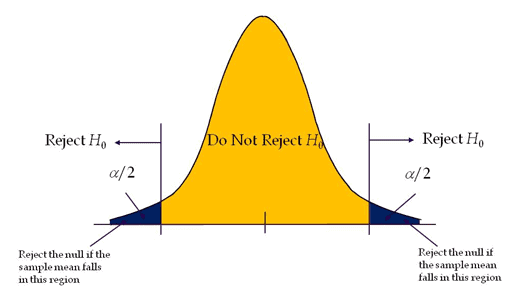

In [55]:
# For one-tailed test (checking improvement => after > before)
if t_stat > 0:
    p_value = p_value_two_tailed / 2
else:
    p_value = 1 - (p_value_two_tailed / 2)

print(f"t-statistic = {t_stat:.3f}")
print(f"p-value (one-tailed) = {p_value:.4f}")

t-statistic = 3.445
p-value (one-tailed) = 0.0027


- we divide the p-value by 2 because we’re converting the two-tailed probability (both sides) into one tail — the direction that matches our hypothesis.
- pvalue < 0.05 : Reject Ho in favour of Ha
- There is a statistically significant improvement in test scores after the Python course.
- The course was useful in improving performance.


# End of tests|

# Two, 1 Tail (Left, <), 1 Tail (Right,>)
- Two tailed
    - Ho : mu1 = mu2 : mu1 - mu2 = 0
    - Ha : mu1 != mu2
    - ttest_rel(a, b, axis=0, nan_policy='propagate', alternative='two-sided') #paired2S
    - ttest_ind(a, b, axis=0, equal_var=True, alternative='two-sided')  #indep2S
- 1 Tail
    - Left (<)
        - Ha : mu1 < mu2
        - Ho : mu1 >= mu2 : mu1 - mu2 > 0
        - ttest_rel(a, b, axis=0, nan_policy='propagate', alternative='less')#paired2S
        - - ttest_ind(a, b, axis=0, equal_var=True, alternative='less')  #indep2S
    - Right (>)
        - Ha : mu1 > mu2
        - Ho : mu1 <= mu2 : mu1 - mu2 < 0
        - ttest_rel(a, b, axis=0, nan_policy='propagate', alternative='greater') #paired2S
        - ttest_ind(a, b, axis=0, equal_var=True, alternative='greater')  #indep2S

In [80]:
#help(ttest_rel)
#ttest_rel(a, b, axis=0, nan_policy='propagate', alternative='two-sided', *, keepdims=False)
#alternative : {'two-sided', 'less', 'greater'},

In [83]:
#help(ttest_ind)
#ttest_ind(a, b, axis=0, equal_var=True, alternative='two-sided')
#alternative : {'two-sided', 'less', 'greater'}